<a href="https://colab.research.google.com/github/tlsehdgns1999/tlsehdgns1999/blob/main/ip%20r%26d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rcParams['font.family'] = 'NanumBarunGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
path = '/content/drive/MyDrive/clear.csv'

In [4]:
data1 = pd.read_csv(path)

<ipython-input-4-823ce0988458>:1: DtypeWarning: Columns (9,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv(path)


In [5]:
new_data = data1[data1['특허/실용구분'] == '특허등록']
df = new_data[new_data['법적상태'] == '등록']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 21264
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   대분류               9542 non-null   object
 1   중분류               9542 non-null   object
 2   소분류               9542 non-null   object
 3   국가코드              9542 non-null   object
 4   특허/실용구분           9542 non-null   object
 5   발명의 명칭            9542 non-null   object
 6   대표청구항             9542 non-null   object
 7   요약                9542 non-null   object
 8   독립항               9542 non-null   object
 9   청구항 수             9542 non-null   object
 10  법적상태              9542 non-null   object
 11  심사청구여부(KR,JP,EP)  9542 non-null   object
 12  심사진행상태            9542 non-null   object
 13  출원인               9542 non-null   object
 14  출원인(원문)           9542 non-null   object
 15  출원인 국적            9542 non-null   object
 16  현재권리자             9542 non-null   object
 17  현재권리자 국적     

<ipython-input-27-e109c3bfd993>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['출원일'] = pd.to_datetime(df['출원일'])


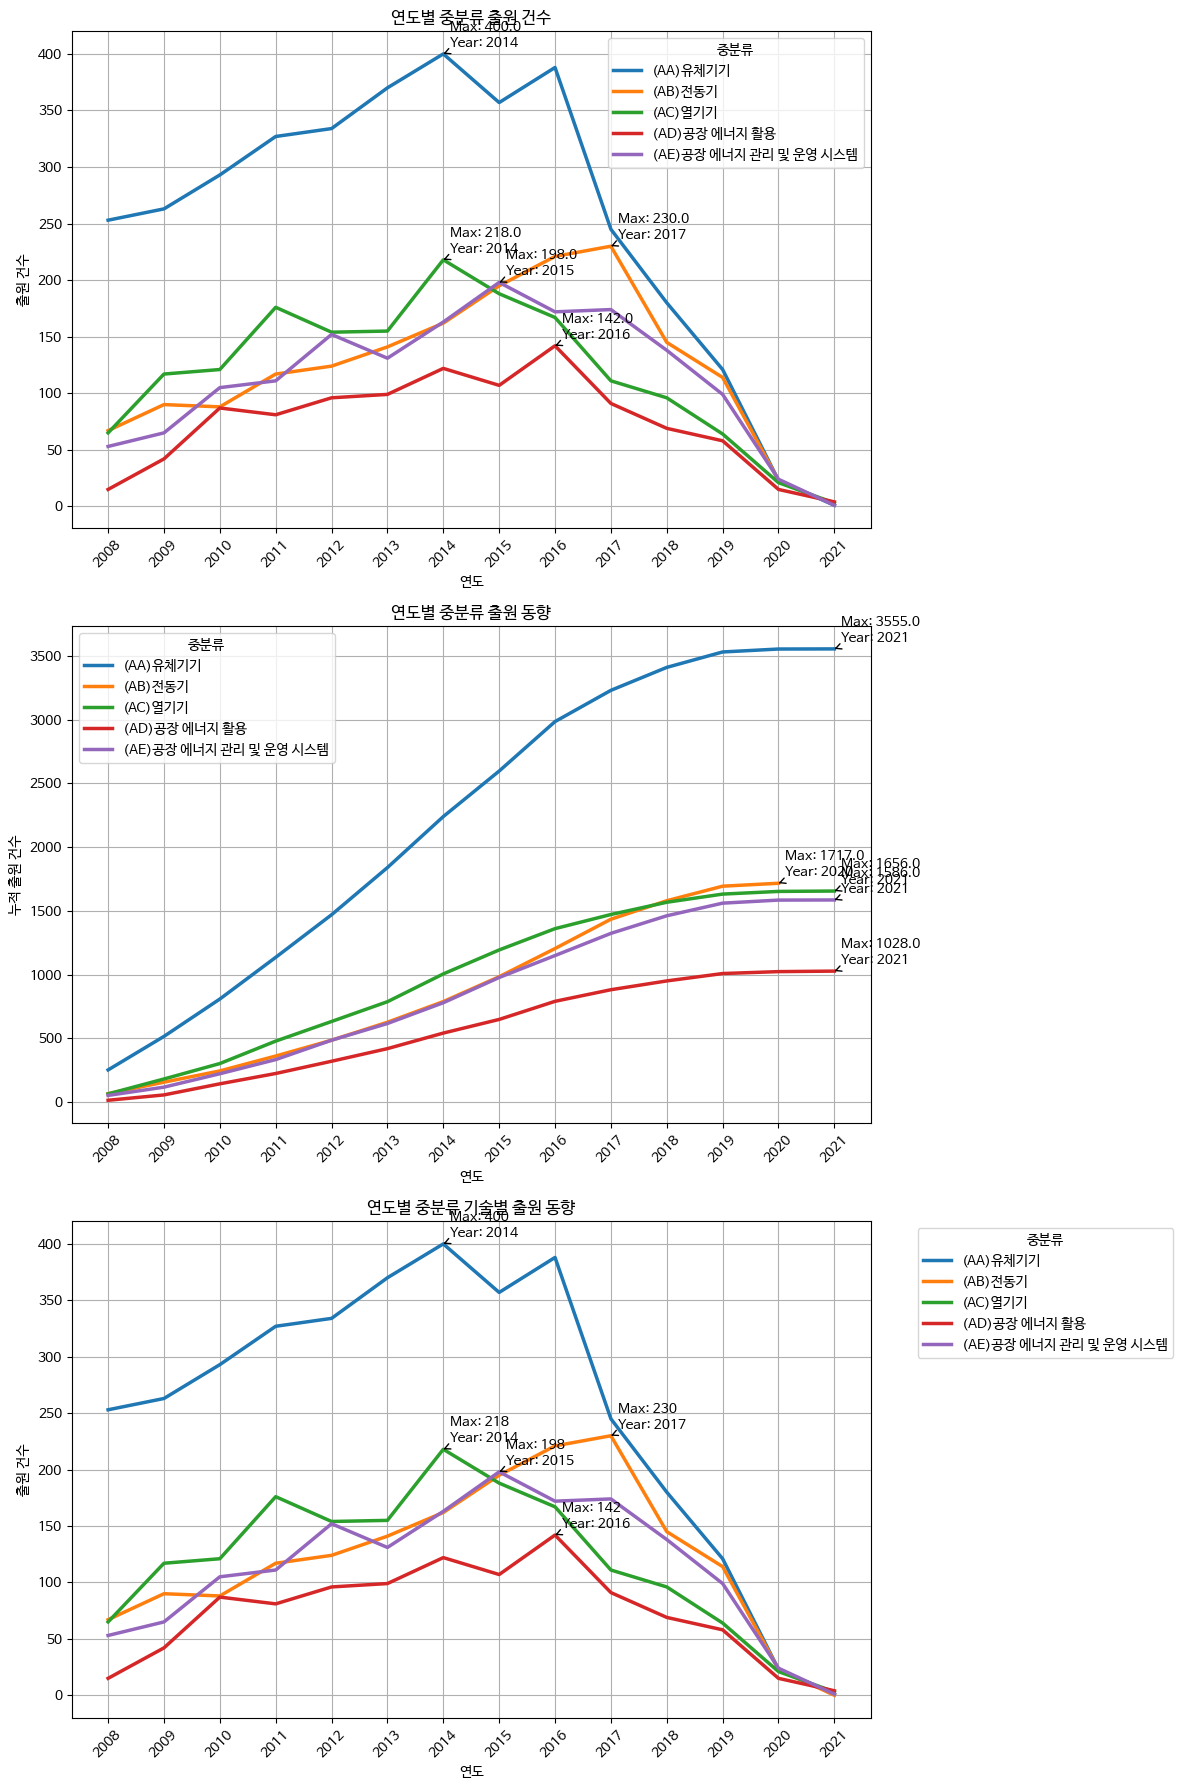

In [27]:
df['출원일'] = pd.to_datetime(df['출원일'])

# 중분류를 기준으로 연도별 출원 건수
pivot_by_year = df.pivot_table(index=df['출원일'].dt.year, columns='중분류', values='출원번호', aggfunc='count')

# 중분류를 기준으로 연도별 출원 동향
pivot_by_year_trend = pivot_by_year.cumsum()

# 중분류를 기준으로 기술별 출원 동향
pivot_by_tech = df.pivot_table(index='중분류', columns=df['출원일'].dt.year, values='출원번호', aggfunc='count', fill_value=0)
pivot_by_tech = pivot_by_tech.transpose()

plt.figure(figsize=(12, 18))

# 연도별 중분류 출원 건수 그래프
plt.subplot(3, 1, 1)
for column in pivot_by_year.columns:
    lineplot = sns.lineplot(data=pivot_by_year[column], label=column, linewidth=2.5)
    max_value = pivot_by_year[column].max()
    max_year = pivot_by_year[column].idxmax()
    lineplot.annotate(f'Max: {max_value}\nYear: {max_year}', xy=(max_year, max_value), xytext=(5,5),
                      textcoords='offset points', arrowprops=dict(arrowstyle='->'))
plt.title('연도별 중분류 출원 건수')
plt.xlabel('연도')
plt.ylabel('출원 건수')
plt.legend(title='중분류')
plt.xticks(rotation=45)
plt.xticks(range(min(df['출원일']).year, max(df['출원일']).year + 1, 1))
plt.grid(True)

# 연도별 중분류 출원 동향 그래프
plt.subplot(3, 1, 2)
for column in pivot_by_year_trend.columns:
    lineplot = sns.lineplot(data=pivot_by_year_trend[column], label=column, linewidth=2.5)
    max_value = pivot_by_year_trend[column].max()
    max_year = pivot_by_year_trend[column].idxmax()
    lineplot.annotate(f'Max: {max_value}\nYear: {max_year}', xy=(max_year, max_value), xytext=(5,5),
                      textcoords='offset points', arrowprops=dict(arrowstyle='->'))
plt.title('연도별 중분류 출원 동향')
plt.xlabel('연도')
plt.ylabel('누적 출원 건수')
plt.legend(title='중분류')
plt.xticks(rotation=45)
plt.xticks(range(min(df['출원일']).year, max(df['출원일']).year + 1, 1))
plt.grid(True)

# 연도별 중분류 기술별 출원 동향 그래프
plt.subplot(3, 1, 3)
for column in pivot_by_tech.columns:
    lineplot = sns.lineplot(data=pivot_by_tech[column], label=column, linewidth=2.5)
    max_value = pivot_by_tech[column].max()
    max_year = pivot_by_tech[column].idxmax()
    lineplot.annotate(f'Max: {max_value}\nYear: {max_year}', xy=(max_year, max_value), xytext=(5,5),
                      textcoords='offset points', arrowprops=dict(arrowstyle='->'))
plt.title('연도별 중분류 기술별 출원 동향')
plt.xlabel('연도')
plt.ylabel('출원 건수')
plt.legend(title='중분류', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.xticks(range(min(df['출원일']).year, max(df['출원일']).year + 1, 1))
plt.grid(True)

plt.tight_layout()
plt.show()

<ipython-input-35-ec77eed82d17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['출원일'] = pd.to_datetime(df['출원일'])
<ipython-input-35-ec77eed82d17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연도'] = df['출원일'].dt.year


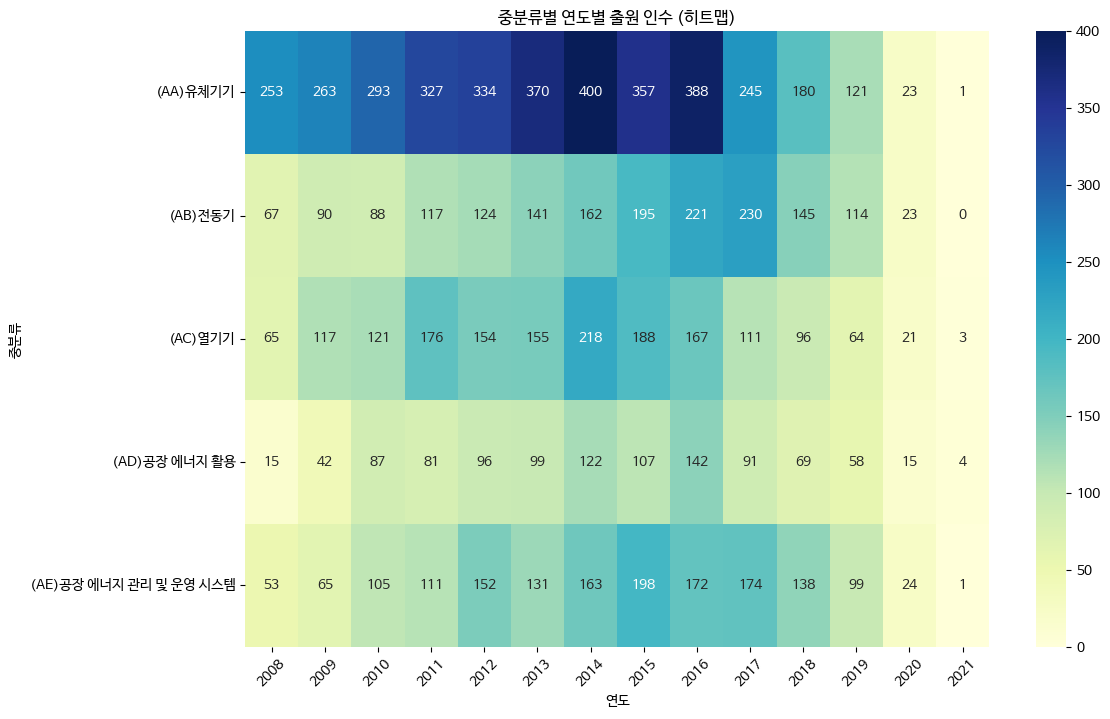

In [35]:
# '출원일' 열에서 연도와 중분류 추출
df['연도'] = df['출원일'].dt.year

# 중분류별 연도별 출원 인수 계산
yearly_applications_by_category = df.groupby(['연도', '중분류'])['출원번호'].count().unstack()

# NaN 값 0으로 대체
yearly_applications_by_category = yearly_applications_by_category.fillna(0)

# 부동소수점 값을 반올림하여 정수로 변환
yearly_applications_by_category = np.round(yearly_applications_by_category).astype(int)

# 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(yearly_applications_by_category.transpose(), cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('중분류별 연도별 출원 인수 (히트맵)')
plt.xlabel('연도')
plt.ylabel('중분류')
plt.xticks(rotation=45)
plt.show()

In [90]:
# 유체기기 출원인 통합
df['출원인'] = df['출원인'].replace('GEN ELECTRIC', 'General Electric Company')
df['출원인'] = df['출원인'].replace('GENERAL ELECTRIC COMPANY', 'General Electric Company')
df['출원인'] = df['출원인'].replace('GENERAL ELECTRIC TECHNOLOGY GMBH', 'General Electric Company')
df['출원인'] = df['출원인'].replace('Mitsubishi Heavy Industries, Ltd.', 'MITSUBISHI HEAVY IND LTD')
df['출원인'] = df['출원인'].replace('MITSUBISHI ELECTRIC CO', 'MITSUBISHI HEAVY IND LTD')
df['출원인'] = df['출원인'].replace('Mitsubishi Hitachi Power Systems, Ltd.', 'MITSUBISHI HEAVY IND LTD')
df['출원인'] = df['출원인'].replace('MITSUBISHI HITACHI POWER SYSTEMS LTD', 'MITSUBISHI HEAVY IND LTD')
df['출원인'] = df['출원인'].replace('VESTAS WIND SYS AS', 'Vestas Wind Systems A/S')
df['출원인'] = df['출원인'].replace('SIEMENS AG', 'Siemens Aktiengesellschaft')
df['출원인'] = df['출원인'].replace('HITACHI LTD', 'HITACHI INDUSTRIAL EQUIPMENT SYSTEMS CO LTD')

# 전동기 출원인 통합
df['출원인'] = df['출원인'].replace('Mitsubishi Electric Corporation', 'MITSUBISHI HEAVY IND LTD')
df['출원인'] = df['출원인'].replace('FANUC CORP', 'FANUC LTD')

# 열기기 출원인 통합
df['출원인'] = df['출원인'].replace('General Electric Technology GmbH', 'General Electric Company')

# 공장 어쩌구 출원인 통합
df['출원인'] = df['출원인'].replace('SAUDI ARABIAN OIL CO', 'Saudi Arabian Oil Company')

# 공장 에너지 어쩌구 출원인 통합
df['출원인'] = df['출원인'].replace('Hitachi, Ltd.', 'HITACHI INDUSTRIAL EQUIPMENT SYSTEMS CO LTD')

<ipython-input-90-4117f4d2cf1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['출원인'] = df['출원인'].replace('GEN ELECTRIC', 'General Electric Company')
<ipython-input-90-4117f4d2cf1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['출원인'] = df['출원인'].replace('GENERAL ELECTRIC COMPANY', 'General Electric Company')
<ipython-input-90-4117f4d2cf1f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [92]:
df['출원인'] = df['출원인'].replace('MITSUBISHI HEAVY IND LTD', 'MITSUBISHI')
df['출원인'] = df['출원인'].replace('Siemens Aktiengesellschaft', 'Siemens')
df['출원인'] = df['출원인'].replace('Vestas Wind Systems A/S', 'Vestas Wind Systems')
df['출원인'] = df['출원인'].replace('HITACHI INDUSTRIAL EQUIPMENT SYSTEMS CO LTD', 'HITACHI')
df['출원인'] = df['출원인'].replace('IHI CO', 'IHI')
df['출원인'] = df['출원인'].replace('ANSALDO ENERGIA SWITZERLAND AG', 'ANSALDO ENERGIA')
df['출원인'] = df['출원인'].replace('Wobben Properties GmbH', 'Wobben Properties')
df['출원인'] = df['출원인'].replace('ALSTOM TECHNOLOGY LTD', 'ALSTOM TECHNOLOGY')

<ipython-input-92-91ec007a513e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['출원인'] = df['출원인'].replace('MITSUBISHI HEAVY IND LTD', 'MITSUBISHI')
<ipython-input-92-91ec007a513e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['출원인'] = df['출원인'].replace('Siemens Aktiengesellschaft', 'Siemens')
<ipython-input-92-91ec007a513e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [94]:
df['출원인'] = df['출원인'].replace('FANUC LTD', 'FANUC')
df['출원인'] = df['출원인'].replace('JFE STEEL CO', 'JFE STEEL')
df['출원인'] = df['출원인'].replace('PANASONIC IP MANAGEMENT CO', 'PANASONIC')
df['출원인'] = df['출원인'].replace('Air Products and Chemicals, Inc.', 'Air Products and Chemicals')
df['출원인'] = df['출원인'].replace('King Fahd University of Petroleum and Minerals', 'UNIV KING FAHD')
df['출원인'] = df['출원인'].replace('Allure Energy, Inc.', 'Allure Energy')
df['출원인'] = df['출원인'].replace('GUANGDONG ELECTRIC POWER DESIGN INST OF CHINA ENERGY ENG GROUP CO LTD', 'GUANGDONG ELECTRIC')
df['출원인'] = df['출원인'].replace('SAMSUNG ELECTRONICS CO., LTD.', '삼성전자')
df['출원인'] = df['출원인'].replace('FISHER ROSEMOUNT SYSTEMS INC', 'FISHER ROSEMOUNT SYSTEMS')
df['출원인'] = df['출원인'].replace('BROADCOM CORPORATION', 'BROADCOM')
df['출원인'] = df['출원인'].replace('Rockwell Automation Technologies, Inc.', 'Rockwell Automation')
df['출원인'] = df['출원인'].replace('두산중공업 주식회사', '두산중공업')

<ipython-input-94-7163a346fdba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['출원인'] = df['출원인'].replace('FANUC LTD', 'FANUC')
<ipython-input-94-7163a346fdba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['출원인'] = df['출원인'].replace('JFE STEEL CO', 'JFE STEEL')
<ipython-input-94-7163a346fdba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [95]:
# 중분류를 기준으로 출원인별로 그룹화하고 각 그룹별로 개수 세기
grouped = df.groupby('중분류')['출원인'].value_counts()

# 그룹별 개수를 기준으로 내림차순 정렬하여 상위 10개 출력
top_10 = grouped.groupby(level=0, group_keys=False).nlargest(10)
print(top_10)

중분류                     출원인                                
(AA)유체기기                MITSUBISHI                             245
                        General Electric Company               237
                        Siemens                                 87
                        Vestas Wind Systems                     59
                        HITACHI                                 51
                        IHI                                     25
                        Johnson Controls Technology Company     25
                        ANSALDO ENERGIA                         22
                        Wobben Properties                       18
                        ALSTOM TECHNOLOGY                       17
(AB)전동기                 MITSUBISHI                              49
                        FANUC                                   33
                        UNIV SOUTHEAST                          31
                        HITACHI                                 28
  

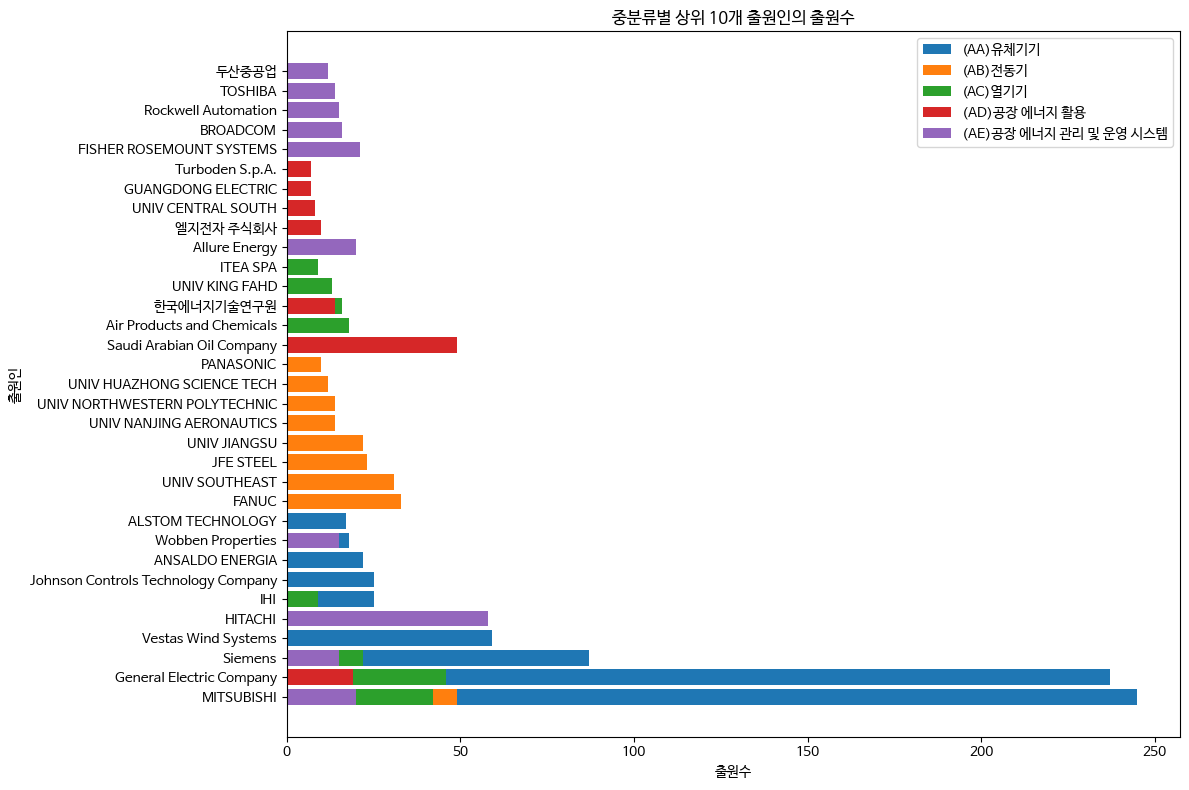

In [108]:
# 중분류를 기준으로 출원인별로 그룹화하고 출원수 세기
grouped = df.groupby(['중분류', '출원인']).size().reset_index(name='출원수')

# 중분류별로 상위 10개의 출원인 선택
top_10_per_group = grouped.groupby('중분류').apply(lambda x: x.nlargest(10, '출원수')).reset_index(drop=True)

# 그래프 그리기
plt.figure(figsize=(12, 8))

for group_name, group_data in top_10_per_group.groupby('중분류'):
    plt.barh(group_data['출원인'], group_data['출원수'], label=group_name)

plt.xlabel('출원수')
plt.ylabel('출원인')
plt.title('중분류별 상위 10개 출원인의 출원수')
plt.legend()
plt.tight_layout()
plt.show()